

### 1. Introduction to the Problem of Study


Fuzzy logic is amongst the techniques that have emerged and been used in diverse practical control systems such as artificial intelligence, medicine, and economics, where stringent degrees of accuracy are not necessary, and a measure of uncertainty is required. This project seeks to portray the working principles and application of fuzzy logic within the domain of household electric power consumptions.

The energy consumption of households has never failed to attract attention, and in contemporary times it is regarded as an accelerating benefit together with energy saving and environmental preservation. Household energy consumption levels are dependent on several factors such as the weather (temperature and humidity), and the time of the day which are influenced by behavioral cycles. Being capable of understanding and predicting energy consumption load in a more accurate way leads to better forecast of energy supply requirements, its distribution and results in savings on the energy expenses. The role of this study is to simulate the energy usage of a household and show how certain external factors such as temperature, humidity, and time of the day contribute to variation in energy usage. Fuzzy logic is an appropriate tool as it helps capture the uncertainty and ambiguity that is associated with both human actions and the external environment.

---

### 2. Brief and General Description of the Approach and Methods Used

The project employs the fuzzy logic approach to estimate the household energy consumption (`active_energy`) which is the consumption ‘active_energy’ of households by predicting interdependencies between temperature, humidity and time of day. It is interesting to note that fuzzy logic is preferred because it enables the use of imprecise data for example “high temperature” or “evening” is real doesn’t have an exact definition and logic gives way to easiness by imprecision concept.

The dataset consists of weather and energy records at a closer level of detail based on temp (temperature); rhum (humidity) and hour (the time of day). The model specifies rules for how combinations of these fuzzy variables set with membership functions such as ‘temp’-low, moderate, high, affect the levels of active_energy. Before setting up the fuzzy logic rules;

- Extracted relevant columns for analysis, including humidity, temperature, and time.
- Fuzzified each variable into various classes.
- Concatenated the newly generated class columns for each variable of interest.


 This approach enabled us to design rules that better reflect real-world interactions between conditions like temperature fluctuations, daily routines, and household energy use patterns.


---

### 3. Brief History and Literature Review of the Problem and Methods/Algorithms


Several studies have demonstrated the effectiveness of fuzzy logic in energy prediction. For instance, researchers have applied fuzzy logic to model energy consumption based on weather parameters, finding it effective for interpreting the nonlinear and uncertain impacts of factors like temperature and humidity on energy demand. Other studies combine fuzzy logic with machine learning algorithms (like fuzzy neural networks) for even more complex predictions. The application in household energy consumption is particularly relevant as it enables a nuanced understanding of how fluctuating environmental conditions influence daily energy needs, making it valuable for energy conservation and smart home applications.

---

### 4. About the Main Method/Algorithm Used

The main method used in this study is fuzzy logic, a rule-based approach that handles imprecise and vague data by transforming crisp inputs (like exact temperature or time) into fuzzy values (e.g., "moderate" temperature). Fuzzy logic systems consist of three main components: fuzzification, rule evaluation, and defuzzification.

1. **Data analysis**: This stage sets up the process of determining the input variables. In order to apply the rules, a preliniminary exploratory analysis will be. done within the variables to determine the variables most important and relevant to our output

1. **Fuzzification**: The model first converts crisp values for `temp`, `rhum`, and `hour` into fuzzy sets based on predefined membership functions. For example, a temperature of 25°C might belong partially to "moderate" and "high" fuzzy sets, with membership degrees calculated using triangular functions
   
2. **Rule Evaluation**: The model applies a set of if-then rules to interpret how different fuzzy conditions should influence `active_energy`. For instance, rules might state: *If temperature is high and time is afternoon, then active energy is high*. These rules help capture the relationship between environmental factors and energy use patterns.

3. **Defuzzification**: Finally, the fuzzy results are converted back into a crisp output value (like a specific `active_energy` level) that can be compared with actual energy usage. The defuzzified output allows for an interpretable prediction that approximates household energy consumption based on the fuzzy conditions.

Fuzzy logic's flexibility and interpretability make it a suitable choice for modeling complex, uncertain relationships in energy consumption, especially where exact input-output relationships are challenging to define. This approach's main advantage is its ability to handle the ambiguity of real-world conditions, providing an intuitive, human-like way to model energy demand based on weather and time patterns.

### 5. Python imports and global configurations [0,5 valor]

In [144]:
# Load the data
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


### 6. Dataset and variables explanation [1,5 valor]

#### Read the data

In [ ]:
drive.mount('/content/drive')
power =pd.read_csv('/content/drive/My Drive/household_power_consumption.txt', sep=';')
temp = pd.read_csv('/content/drive/My Drive/sceaux_hourly_temperatures.csv', sep=';')

In [149]:

power = power
temp = temp

# leave only date, time, global_active_power and sub_metering_* columns
power = power[['Date', 'Time', 'Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# parse numeric columns
power['Global_active_power'] = pd.to_numeric(power['Global_active_power'], errors='coerce')
power['Sub_metering_1'] = pd.to_numeric(power['Sub_metering_1'], errors='coerce')
power['Sub_metering_2'] = pd.to_numeric(power['Sub_metering_2'], errors='coerce')
power['Sub_metering_3'] = pd.to_numeric(power['Sub_metering_3'], errors='coerce')

# Convert the date and time columns to datetime
power['timestamp'] = pd.to_datetime(power['Date'] + ' ' + power['Time'], format='%d/%m/%Y %H:%M:%S')
temp['timestamp'] = pd.to_datetime(temp['time'], format='%Y-%m-%d %H:%M:%S')

power
# temp['time'] = pd.to_datetime(temp['time'])

# calculate 1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
power['active_energy'] = (power['Global_active_power']*1000/60 - power['Sub_metering_1'] - power['Sub_metering_2'] - power['Sub_metering_3'])

# merge the two dataframes by timestamp
data = pd.merge(power, temp, on='timestamp', how='inner')
data


# find correlation between active_energy and temp
data.head()

<ipython-input-149-e2c4196955c3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power['Global_active_power'] = pd.to_numeric(power['Global_active_power'], errors='coerce')
<ipython-input-149-e2c4196955c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power['Sub_metering_1'] = pd.to_numeric(power['Sub_metering_1'], errors='coerce')
<ipython-input-149-e2c4196955c3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Date,Time,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,timestamp,active_energy,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,16/12/2006,18:00:00,2.790,0.0,0.0,18.0,2006-12-16 18:00:00,28.500000,2006-12-16 18:00:00,6.9,4.2,83.0,NaN,NaN,340.0,14.8,NaN,1026.8,NaN,NaN
1,16/12/2006,19:00:00,4.070,0.0,1.0,17.0,2006-12-16 19:00:00,49.833333,2006-12-16 19:00:00,6.4,3.7,83.0,0.0,NaN,340.0,14.8,NaN,1027.5,NaN,NaN
2,16/12/2006,20:00:00,3.206,0.0,0.0,16.0,2006-12-16 20:00:00,37.433333,2006-12-16 20:00:00,6.0,4.0,87.0,0.0,NaN,310.0,7.6,NaN,1028.0,NaN,NaN
3,16/12/2006,21:00:00,3.314,0.0,0.0,17.0,2006-12-16 21:00:00,38.233333,2006-12-16 21:00:00,5.6,3.8,88.0,NaN,NaN,310.0,7.6,NaN,1028.6,NaN,NaN
4,16/12/2006,22:00:00,3.464,0.0,1.0,17.0,2006-12-16 22:00:00,39.733333,2006-12-16 22:00:00,5.1,3.8,91.0,0.0,NaN,260.0,7.6,NaN,1028.9,NaN,NaN


In [150]:
### lets extract our variable of interest

data=data[['timestamp','active_energy', 'temp', 'rhum' ]]

In [151]:
# Convert timestamp to datetime and then to time
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%H:%M:%S').dt.time

# Convert times to minutes since midnight
data['time_minutes'] = data['timestamp'].apply(lambda t: t.hour * 60 + t.minute)


<ipython-input-151-2c429acf0f43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['timestamp'] = pd.to_datetime(data['timestamp'], format='%H:%M:%S').dt.time
<ipython-input-151-2c429acf0f43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_minutes'] = data['timestamp'].apply(lambda t: t.hour * 60 + t.minute)


#### variable explaination

- timestamp: A combined timestamp column that merges the date and time, serving as the unique identifier for each recorded entry.
-  temp: The air temperature (°C)
- rhum: Relative humidity (%)
-active_energy: An additional measure of energ that captures active energy used in the household.
- time_minutes: timestamp converted to time in minutes

In [159]:
#quick data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      34567 non-null  object 
 1   active_energy  34131 non-null  float64
 2   temp           34507 non-null  float64
 3   rhum           34507 non-null  float64
 4   time_minutes   34567 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ MB


In [154]:
#null count
data.isnull().sum()

In [155]:
#data
data.duplicated().sum()

13

In [157]:
#lets see the duplicated data
data[data.duplicated()]

,timestamp,active_energy,temp,rhum,time_minutes
6130,04:00:00,1.900000,NaN,NaN,240
8098,04:00:00,3.800000,3.9,92.0,240
13819,13:00:00,3.300000,22.4,42.0,780
19951,01:00:00,5.166667,9.1,87.0,60
21227,05:00:00,4.733333,9.7,96.0,300
21754,04:00:00,5.266667,12.1,88.0,240
23720,02:00:00,4.866667,15.7,65.0,120
25428,06:00:00,6.300000,4.7,90.0,360
26993,11:00:00,NaN,3.8,83.0,660
28759,01:00:00,6.133333,11.5,89.0,60


In [158]:
#drop duplicates
data.drop_duplicates()

,timestamp,active_energy,temp,rhum,time_minutes
0,18:00:00,28.500000,6.9,83.0,1080
1,19:00:00,49.833333,6.4,83.0,1140
2,20:00:00,37.433333,6.0,87.0,1200
3,21:00:00,38.233333,5.6,88.0,1260
4,22:00:00,39.733333,5.1,91.0,1320
...,...,...,...,...,...
34562,20:00:00,20.433333,1.8,82.0,1200
34563,21:00:00,25.200000,1.5,83.0,1260
34564,22:00:00,19.866667,1.4,82.0,1320
34565,23:00:00,7.800000,0.0,94.0,1380


### 7. Main code as possible solution to the problem [1,5 valor]


**Fuzzy Membership Degree Calculation**

In [160]:


# Define the Points class to hold quantile information
class Points:
    def __init__(self, min_val, Q1, Q2, Q3, max_val):
        self.min = min_val
        self.Q1 = Q1
        self.Q2 = Q2
        self.Q3 = Q3
        self.max = max_val

    def ll(self):
        return self.Q1 - (self.Q2 - self.Q1)  # Lower limit calculation

    def hl(self):
        return self.Q3 + (self.Q3 - self.Q2)  # Higher limit calculation

# Define the Interpolation class for calculating membership degrees
class Interpolation:
    def __init__(self, obj, labels):
        self.object = obj
        self.labels = labels
        self.Q1 = self.object.Q1
        self.Q2 = self.object.Q2
        self.Q3 = self.object.Q3
        self.ll = self.object.ll()
        self.hl = self.object.hl()
        self.graphParts()

    def graphParts(self):
        self.low_part1 = [(self.object.ll() - 0.5 * (self.object.ll() - self.object.min)), self.object.ll()]
        self.low_part2 = [self.object.ll(), self.object.Q1]
        self.low_part3 = [self.object.Q1, 0.5 * (self.object.Q1 + self.object.Q2)]
        self.normal_part1 = [self.object.Q1, 0.5 * (self.object.Q1 + self.object.Q2)]
        self.normal_part2 = [0.5 * (self.object.Q1 + self.object.Q2), 0.5 * (self.object.Q2 + self.object.Q3)]
        self.normal_part3 = [0.5 * (self.object.Q2 + self.object.Q3), self.object.Q3]
        self.high_part1 = [0.5 * (self.object.Q2 + self.object.Q3), self.object.Q3]
        self.high_part2 = [self.object.Q3, self.object.hl()]
        self.high_part3 = [self.object.hl(), self.object.hl() + 0.5 * (self.object.max - self.object.hl())]

    def interpolationFunction(self, xpoints, ypoints):
        interpolation_function = interp1d(xpoints, ypoints)
        return interpolation_function(self.number)

    def membershipDegreeCalculator(self, number):
        self.number = number
        self.membershipDegrees = {label: 0 for label in self.labels}

        # Adjust temperature labels
        if 'low' in self.labels:
            if self.low_part1[0] <= self.number <= self.low_part1[1]:
                self.membershipDegrees['low'] = self.interpolationFunction(self.low_part1, [0, 1])
            elif self.low_part2[0] <= self.number <= self.low_part2[1]:
                self.membershipDegrees['low'] = self.interpolationFunction(self.low_part2, [1, 1])
            elif self.low_part3[0] <= self.number <= self.low_part3[1]:
                self.membershipDegrees['low'] = self.interpolationFunction(self.low_part3, [1, 0])

        if 'normal' in self.labels:
            if self.normal_part1[0] <= self.number <= self.normal_part1[1]:
                self.membershipDegrees['normal'] = self.interpolationFunction(self.normal_part1, [0, 1])
            elif self.normal_part2[0] <= self.number <= self.normal_part2[1]:
                self.membershipDegrees['normal'] = self.interpolationFunction(self.normal_part2, [1, 1])
            elif self.normal_part3[0] <= self.number <= self.normal_part3[1]:
                self.membershipDegrees['normal'] = self.interpolationFunction(self.normal_part3, [1, 0])

        if 'high' in self.labels:
            if self.high_part1[0] <= self.number <= self.high_part1[1]:
                self.membershipDegrees['high'] = self.interpolationFunction(self.high_part1, [0, 1])
            elif self.high_part2[0] <= self.number <= self.high_part2[1]:
                self.membershipDegrees['high'] = self.interpolationFunction(self.high_part2, [1, 1])
            elif self.high_part3[0] <= self.number <= self.high_part3[1]:
                self.membershipDegrees['high'] = self.interpolationFunction(self.high_part3, [1, 0])

        # Adjust time labels (updated to morning, afternoon, and night)
        if 'morning' in self.labels:
            if self.low_part1[0] <= self.number <= self.low_part1[1]:
                self.membershipDegrees['morning'] = self.interpolationFunction(self.low_part1, [0, 1])
            elif self.low_part2[0] <= self.number <= self.low_part2[1]:
                self.membershipDegrees['morning'] = self.interpolationFunction(self.low_part2, [1, 1])
            elif self.low_part3[0] <= self.number <= self.low_part3[1]:
                self.membershipDegrees['morning'] = self.interpolationFunction(self.low_part3, [1, 0])

        if 'afternoon' in self.labels:
            if self.normal_part1[0] <= self.number <= self.normal_part1[1]:
                self.membershipDegrees['afternoon'] = self.interpolationFunction(self.normal_part1, [0, 1])
            elif self.normal_part2[0] <= self.number <= self.normal_part2[1]:
                self.membershipDegrees['afternoon'] = self.interpolationFunction(self.normal_part2, [1, 1])
            elif self.normal_part3[0] <= self.number <= self.normal_part3[1]:
                self.membershipDegrees['afternoon'] = self.interpolationFunction(self.normal_part3, [1, 0])

        if 'night' in self.labels:
            if self.hl <= self.number <= self.object.max:
                self.membershipDegrees['night'] = 1
            elif self.number > self.object.Q3 and self.number < self.hl:
                self.membershipDegrees['night'] = self.interpolationFunction([self.object.Q3, self.hl], [1, 0])

        # Adjust active energy labels
        if 'low' in self.labels:
            if self.low_part1[0] <= self.number <= self.low_part1[1]:
                self.membershipDegrees['low'] = self.interpolationFunction(self.low_part1, [0, 1])
            elif self.low_part2[0] <= self.number <= self.low_part2[1]:
                self.membershipDegrees['low'] = self.interpolationFunction(self.low_part2, [1, 1])
            elif self.low_part3[0] <= self.number <= self.low_part3[1]:
                self.membershipDegrees['low'] = self.interpolationFunction(self.low_part3, [1, 0])

        if 'moderate' in self.labels:
            if self.normal_part1[0] <= self.number <= self.normal_part1[1]:
                self.membershipDegrees['moderate'] = self.interpolationFunction(self.normal_part1, [0, 1])
            elif self.normal_part2[0] <= self.number <= self.normal_part2[1]:
                self.membershipDegrees['moderate'] = self.interpolationFunction(self.normal_part2, [1, 1])
            elif self.normal_part3[0] <= self.number <= self.normal_part3[1]:
                self.membershipDegrees['moderate'] = self.interpolationFunction(self.normal_part3, [1, 0])

        if 'high' in self.labels:
            if self.high_part1[0] <= self.number <= self.high_part1[1]:
                self.membershipDegrees['high'] = self.interpolationFunction(self.high_part1, [0, 1])
            elif self.high_part2[0] <= self.number <= self.high_part2[1]:
                self.membershipDegrees['high'] = self.interpolationFunction(self.high_part2, [1, 1])
            elif self.high_part3[0] <= self.number <= self.high_part3[1]:
                self.membershipDegrees['high'] = self.interpolationFunction(self.high_part3, [1, 0])

        return self.membershipDegrees




**Quantile Calculation and Fuzzy Interpolation Initialization**

In [161]:
# Calculate quantiles for each relevant column
temp_quantiles = data['temp'].quantile([0, 0.25, 0.5, 0.75, 1]).values
energy_quantiles = data['active_energy'].quantile([0, 0.25, 0.5, 0.75, 1]).values
time_quantiles = data['time_minutes'].quantile([0, 0.25, 0.5, 0.75, 1]).values

# Create Points objects using the calculated quantiles
temp_points = Points(*temp_quantiles)          # Unpack the quantiles for temperature
time_points = Points(*time_quantiles)          # Unpack the quantiles for time
energy_points = Points(*energy_quantiles)      # Unpack the quantiles for active energy

# Define Interpolation objects for temp, time, and energy with updated labels
temp_interpolation = Interpolation(temp_points, ['low', 'normal', 'high'])
time_interpolation = Interpolation(time_points, ['morning', 'afternoon', 'night'])
energy_interpolation = Interpolation(energy_points, ['low', 'moderate', 'high'])



**Membership Degree Calculation for Temperature, Time, and Energy**

In [162]:
# Generate ranges of values for temp, time, and energy based on DataFrame
temperature_values = np.arange(data['temp'].min(), data['temp'].max() + 1, 1)  # From min to max temp
time_values = np.arange(0, 1441, 1)  # For time, from 0 to 1440 minutes (24 hours)
energy_values = np.arange(data['active_energy'].min(), data['active_energy'].max() + 1, 1)  # From min to max active energy

# Prepare storage for membership degrees
temp_membership = {'low': [], 'normal': [], 'high': []}
time_membership = {'morning': [], 'afternoon': [], 'night': []}
energy_membership = {'low': [], 'moderate': [], 'high': []}

# Calculate membership degrees for temperature
for temp_val in temperature_values:
    temp_degrees = temp_interpolation.membershipDegreeCalculator(temp_val)
    temp_membership['low'].append(temp_degrees['low'])
    temp_membership['normal'].append(temp_degrees['normal'])
    temp_membership['high'].append(temp_degrees['high'])

# Calculate membership degrees for time
for time_val in time_values:
    time_degrees = time_interpolation.membershipDegreeCalculator(time_val)
    time_membership['morning'].append(time_degrees['morning'])
    time_membership['afternoon'].append(time_degrees['afternoon'])
    time_membership['night'].append(time_degrees['night'])

# Calculate membership degrees for active energy
for energy_val in energy_values:
    energy_degrees = energy_interpolation.membershipDegreeCalculator(energy_val)
    energy_membership['low'].append(energy_degrees['low'])
    energy_membership['moderate'].append(energy_degrees['moderate'])
    energy_membership['high'].append(energy_degrees['high'])



**Visualization of Membership Degrees for Temperature, Time, and Active Energy**

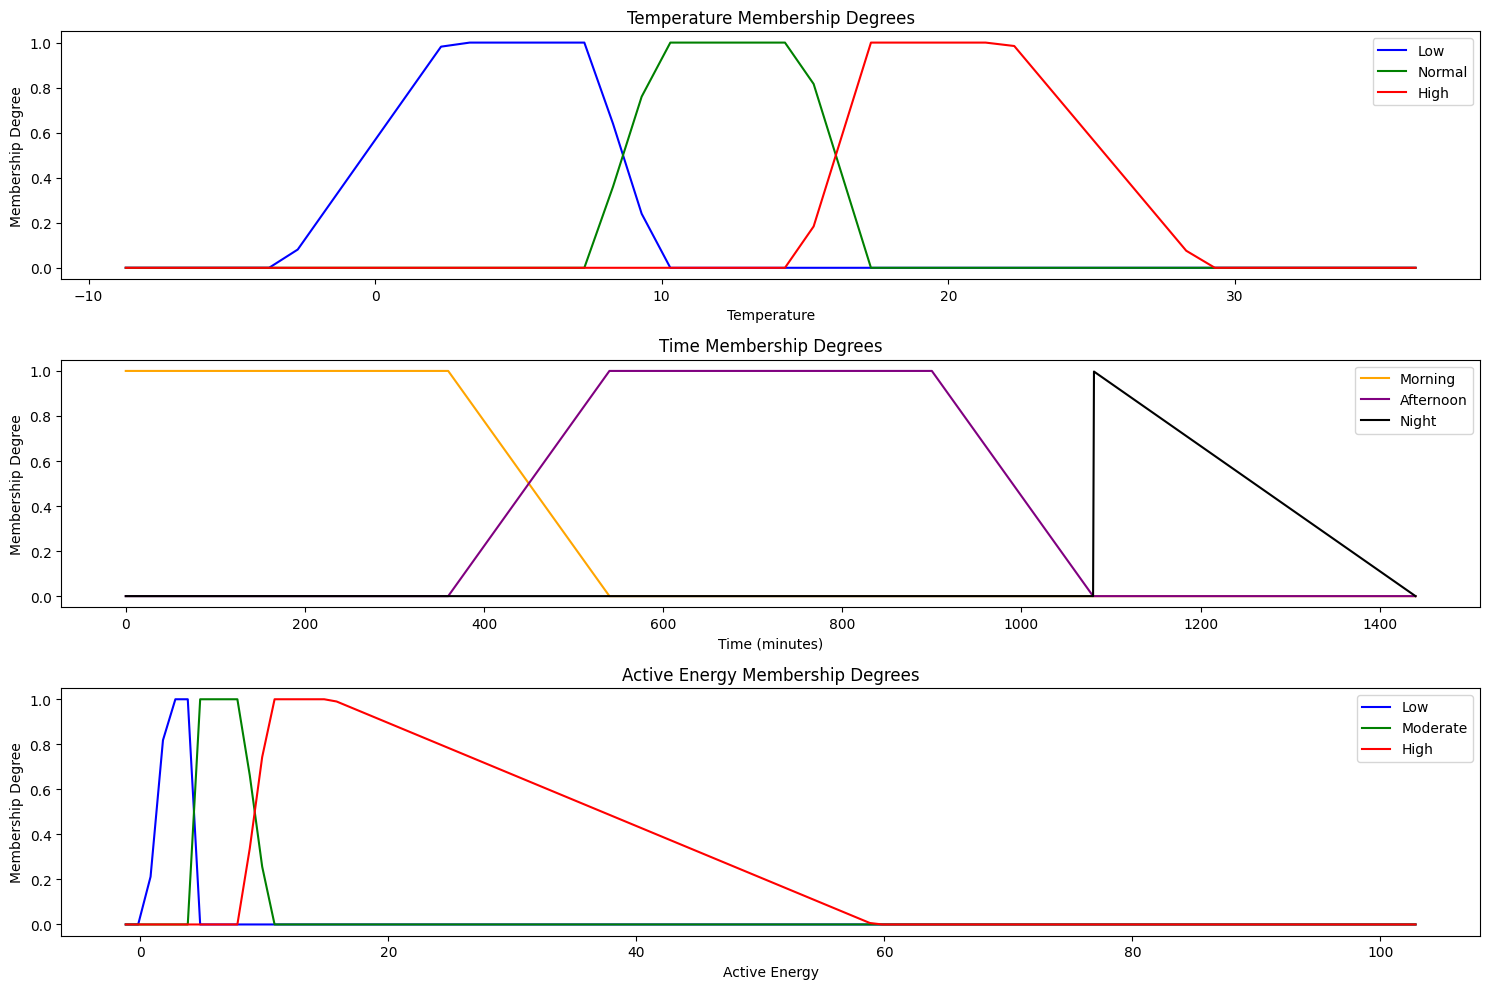

In [163]:
# Plotting the results (optional)
plt.figure(figsize=(15, 10))

# Temperature membership degrees
plt.subplot(3, 1, 1)
plt.title('Temperature Membership Degrees')
plt.plot(temperature_values, temp_membership['low'], label='Low', color='blue')
plt.plot(temperature_values, temp_membership['normal'], label='Normal', color='green')
plt.plot(temperature_values, temp_membership['high'], label='High', color='red')
plt.xlabel('Temperature')
plt.ylabel('Membership Degree')
plt.legend()

# Time membership degrees
plt.subplot(3, 1, 2)
plt.title('Time Membership Degrees')
plt.plot(time_values, time_membership['morning'], label='Morning', color='orange')
plt.plot(time_values, time_membership['afternoon'], label='Afternoon', color='purple')
plt.plot(time_values, time_membership['night'], label='Night', color='black')
plt.xlabel('Time (minutes)')
plt.ylabel('Membership Degree')
plt.legend()

# Active energy membership degrees
plt.subplot(3, 1, 3)
plt.title('Active Energy Membership Degrees')
plt.plot(energy_values, energy_membership['low'], label='Low', color='blue')
plt.plot(energy_values, energy_membership['moderate'], label='Moderate', color='green')
plt.plot(energy_values, energy_membership['high'], label='High', color='red')
plt.xlabel('Active Energy')
plt.ylabel('Membership Degree')
plt.legend()

plt.tight_layout()
plt.show()


**Classification of Membership Degrees and Rule Generation in the DataFrame**

In [166]:
# now we  want to create a new column in the dataframe that defines membership class for each variable

# Functions to classify temperature, time, and energy based on the highest membership degree
def classify_label(degrees):
    max_label = max(degrees, key=degrees.get)
    return max_label, degrees[max_label]



# Calculate quantiles for each relevant column
temp_quantiles = data['temp'].quantile([0, 0.25, 0.5, 0.75, 1]).values
time_quantiles = data['time_minutes'].quantile([0, 0.25, 0.5, 0.75, 1]).values
energy_quantiles = data['active_energy'].quantile([0, 0.25, 0.5, 0.75, 1]).values

# Create Points objects using the calculated quantiles
temp_points = Points(*temp_quantiles)
time_points = Points(*time_quantiles)
energy_points = Points(*energy_quantiles)

# Define Interpolation objects for temp, time, and energy with updated labels
temp_interpolation = Interpolation(temp_points, ['low', 'normal', 'high'])
time_interpolation = Interpolation(time_points, ['morning', 'afternoon', 'night'])
energy_interpolation = Interpolation(energy_points, ['low', 'moderate', 'high'])

# Calculate membership degrees and assign classes to the DataFrame
data['temp_degree'] = data['temp'].apply(lambda x: temp_interpolation.membershipDegreeCalculator(x))
data['time_degree'] = data['time_minutes'].apply(lambda x: time_interpolation.membershipDegreeCalculator(x))
data['energy_degree'] = data['active_energy'].apply(lambda x: energy_interpolation.membershipDegreeCalculator(x))

# Extract the maximum degree and assign classes based on it
data['temp_class'], data['temp_max_degree'] = zip(*data['temp_degree'].apply(classify_label))
data['time_class'], data['time_max_degree'] = zip(*data['time_degree'].apply(classify_label))
data['energy_class'], data['energy_max_degree'] = zip(*data['energy_degree'].apply(classify_label))

# Add a new column 'rule' that combines 'temp_class', 'time_class', and 'energy_class'
data['rule'] = data['temp_class'] + "_" + data['time_class']

# Display the DataFrame with class columns, their max degrees, and the combined rule
display(data[['temp', 'time_minutes', 'active_energy', 'temp_class', 'temp_degree', 'time_class', 'time_degree', 'energy_class', 'energy_degree', 'rule']].head(10))


,temp,time_minutes,active_energy,temp_class,temp_degree,time_class,time_degree,energy_class,energy_degree,rule
0,6.9,1080,28.500000,low,"{'low': 1.0, 'normal': 0, 'high': 0}",morning,"{'morning': 0, 'afternoon': 0.0, 'night': 0}",high,"{'low': 0, 'moderate': 0, 'high': 0.7003431185...",low_morning
1,6.4,1140,49.833333,low,"{'low': 1.0, 'normal': 0, 'high': 0}",night,"{'morning': 0, 'afternoon': 0, 'night': 0.8333...",high,"{'low': 0, 'moderate': 0, 'high': 0.2123522683...",low_night
2,6.0,1200,37.433333,low,"{'low': 1.0, 'normal': 0, 'high': 0}",night,"{'morning': 0, 'afternoon': 0, 'night': 0.6666...",high,"{'low': 0, 'moderate': 0, 'high': 0.4959969500...",low_night
3,5.6,1260,38.233333,low,"{'low': 1.0, 'normal': 0, 'high': 0}",night,"{'morning': 0, 'afternoon': 0, 'night': 0.5}",high,"{'low': 0, 'moderate': 0, 'high': 0.4776972931...",low_night
4,5.1,1320,39.733333,low,"{'low': 1.0, 'normal': 0, 'high': 0}",night,"{'morning': 0, 'afternoon': 0, 'night': 0.3333...",high,"{'low': 0, 'moderate': 0, 'high': 0.4433854365...",low_night
5,4.4,1380,40.166667,low,"{'low': 1.0, 'normal': 0, 'high': 0}",night,"{'morning': 0, 'afternoon': 0, 'night': 0.1666...",high,"{'low': 0, 'moderate': 0, 'high': 0.4334731223...",low_night
6,3.5,0,15.400000,low,"{'low': 1.0, 'normal': 0, 'high': 0}",morning,"{'morning': 1.0, 'afternoon': 0, 'night': 0}",high,"{'low': 0, 'moderate': 0, 'high': 1.0}",low_morning
7,2.6,60,16.800000,low,"{'low': 1.0, 'normal': 0, 'high': 0}",morning,"{'morning': 1.0, 'afternoon': 0, 'night': 0}",high,"{'low': 0, 'moderate': 0, 'high': 0.9679756004...",low_morning
8,1.8,120,17.233333,low,"{'low': 0.8918918918918919, 'normal': 0, 'high...",morning,"{'morning': 1.0, 'afternoon': 0, 'night': 0}",high,"{'low': 0, 'moderate': 0, 'high': 0.9580632863...",low_morning
9,1.5,180,42.366667,low,"{'low': 0.8378378378378378, 'normal': 0, 'high...",morning,"{'morning': 1.0, 'afternoon': 0, 'night': 0}",high,"{'low': 0, 'moderate': 0, 'high': 0.3831490659...",low_morning


In [141]:
data.groupby(['energy_class', 'rule']).size().reset_index(name='count')

,energy_class,rule,count
0,high,high_afternoon,762
1,high,high_morning,117
2,high,high_night,843
3,high,low_afternoon,2103
4,high,low_morning,368
5,high,low_night,1661
6,high,normal_afternoon,1679
7,high,normal_morning,286
8,high,normal_night,1759
9,low,high_afternoon,3443
